1. Purpose of this project
2. The deep learning package used:
    i. MXNET
3. The dataset used: 
Some dataset can be used: http://stackoverflow.com/questions/11465880/gtzan-music-genre-dataset
We use the GTZAN dataset. This dataset contains 10 different genres: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, and rock. This dataset contains 1000 files. Each file recordes the first 30 seconds of a song. The linkage to download the GTZAN dataset is: http://opihi.cs.uvic.ca/sound/genres.tar.gz
4. Workstages:
	i. Data preparation
    ii. FFT
    iii. Deep Learning

# Stage 1: Data preparation

In [9]:
import numpy as np
import scipy
import sunau
import glob
import os
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from IPython.display import Audio
from intervaltree import Interval,IntervalTree

%matplotlib inline
from matplotlib.pyplot import specgram

In [27]:
#Open an au file
sampleAu=sunau.Au_read('genres/blues/blues.00000.au')

if sampleAu.getnchannels() == 1:
    print "mono,",
else:
    print "stereo,",

# Analysis data structure    
print sampleAu.getsampwidth()*8, "bits,",
sample_rate=sampleAu.getframerate()
print sample_rate, "Hz sampling rate"
total_Frames=sampleAu.getnframes()
print 'Total Frames are:',total_Frames,'\n'

# See what is included in an au file
print sampleAu.readframes(10)

# Seems that the data is stored in HEX format.
sampleAu_data = np.fromstring(sampleAu.readframes(10),'>h')

print sampleAu_data

mono, 16 bits, 22050 Hz sampling rate
Total Frames are: 661794 

 �  ���������#���u
[-1046  -761  -769  -540  -314  -504  -607  -509 -1063 -1436]


(array([[  1.04752057e+03,   8.73227883e+02,   1.65548591e+02, ...,
           2.23706639e+04,   3.51321866e+02,   7.56265698e+04],
        [  1.97095299e+03,   4.58188874e+02,   1.61022122e+03, ...,
           9.35587974e+04,   8.51883244e+03,   8.45919180e+04],
        [  1.55219664e+02,   4.08365163e+02,   7.16126399e+02, ...,
           3.04197499e+04,   8.71792326e+04,   1.87722139e+04],
        ..., 
        [  1.28798210e-05,   4.04161758e-06,   5.87928024e-06, ...,
           4.50415455e-07,   3.78327624e-05,   3.37793987e-06],
        [  3.66130888e-06,   3.40194380e-06,   1.89366905e-06, ...,
           1.66273390e-06,   7.83261981e-06,   3.33016844e-06],
        [  1.16503599e-05,   3.46230507e-06,   2.70591303e-07, ...,
           6.30265181e-06,   1.28829384e-06,   2.10735913e-07]]),
 array([     0.       ,     86.1328125,    172.265625 ,    258.3984375,
           344.53125  ,    430.6640625,    516.796875 ,    602.9296875,
           689.0625   ,    775.1953125,    861.3

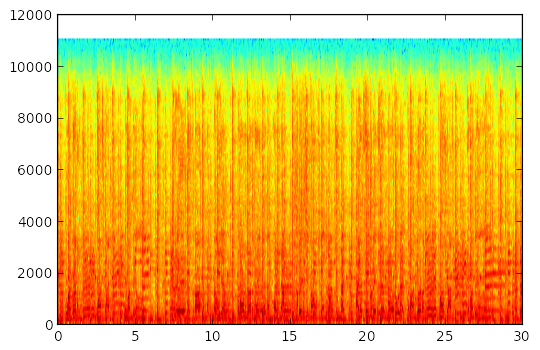

In [28]:
# Convert all the data of one Au file to HEX format
sampleAu_data = np.fromstring(sampleAu.readframes(total_Frames), '>h')

# Generate a specgram of this Au file
specgram(sampleAu_data, Fs=sample_rate, xextent=(0,30))

In [4]:
Audio(sampleAu_data[0:30*sample_rate],rate=sample_rate)

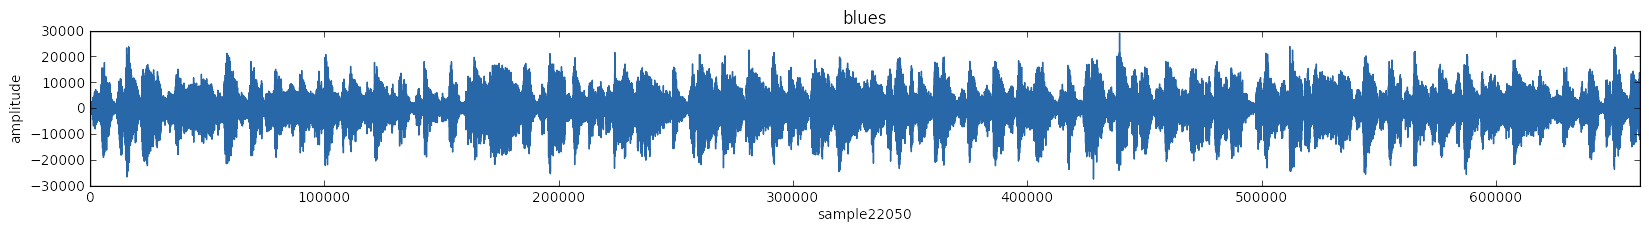

In [38]:
def audiowave(X,sample_rate,genre_list,i):    
    fig = plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(2)
    plt.plot(X[0:30*sample_rate],color=(41/255.,104/255.,168/255.))
    fig.axes[0].set_xlim([0,30*sample_rate])
    fig.axes[0].set_xlabel('sample'+ str(sample_rate))
    fig.axes[0].set_ylabel('amplitude')
    plt.title(genre_list[i])
    fig.show()

genre_list = ["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]
audiowave(sampleAu_data,sample_rate,genre_list,0)

In [10]:
def read_sunau(genre_list, root_dir='genres'):
    
    X = []
    Y = []
    for label, genre in enumerate(genre_list):
        genre_dir = os.path.join(root_dir, genre, "*.au")
        file_list = glob.glob(genre_dir)
        for au in file_list:
            sampleAu=sunau.Au_read(au)
            total_Frames=sampleAu.getnframes()
            sampleAu_data = np.fromstring(sampleAu.readframes(total_Frames),'>h')
            X.append(sampleAu_data)
            Y.append(label)
    return np.array(X), np.array(Y)
X,Y=read_sunau(genre_list)

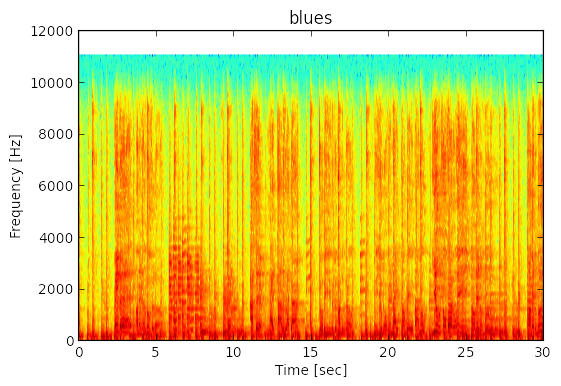

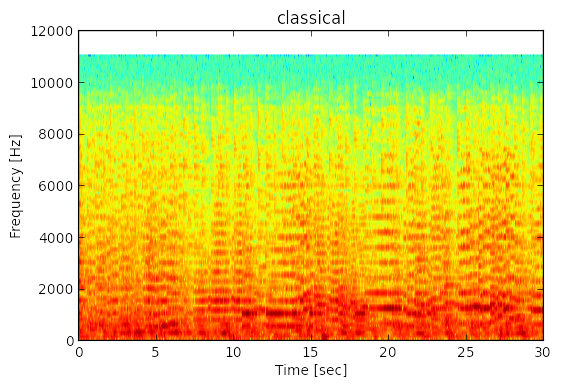

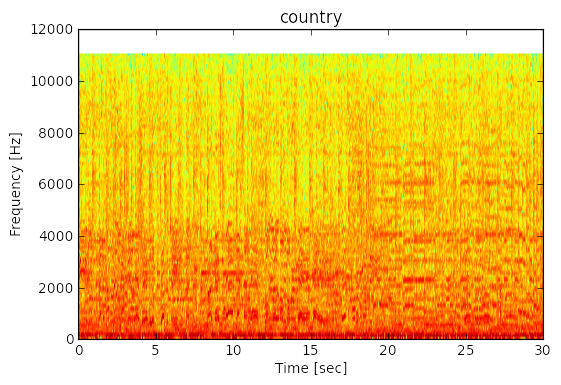

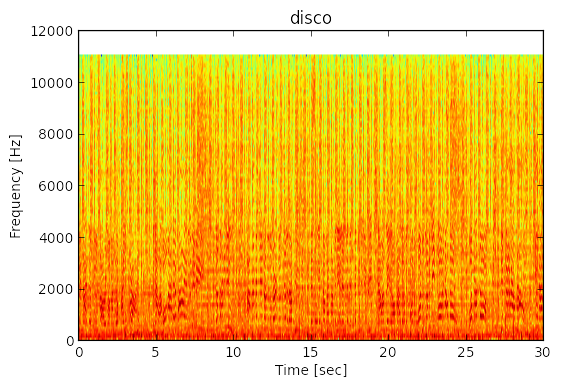

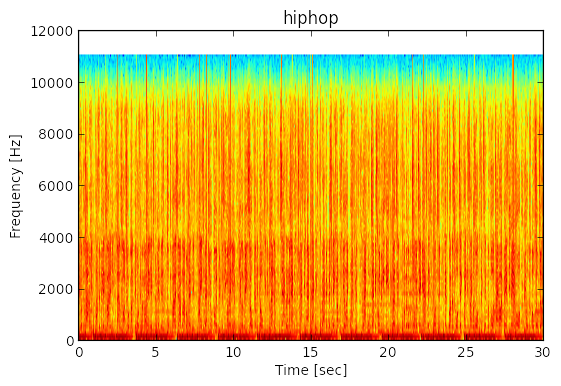

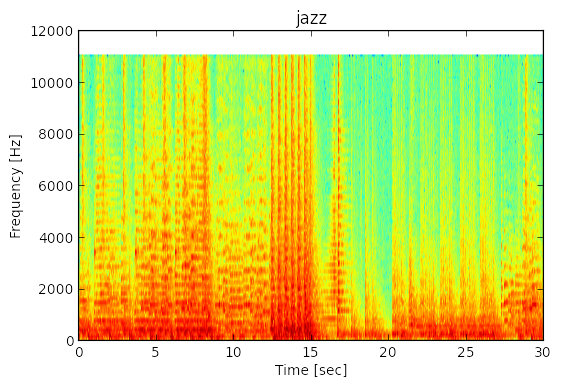

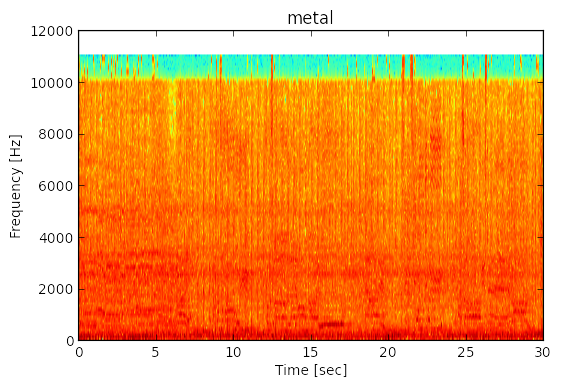

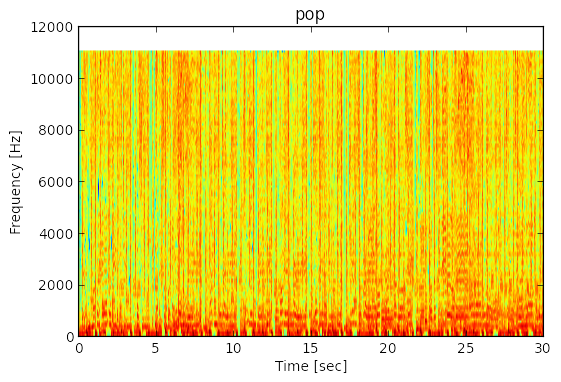

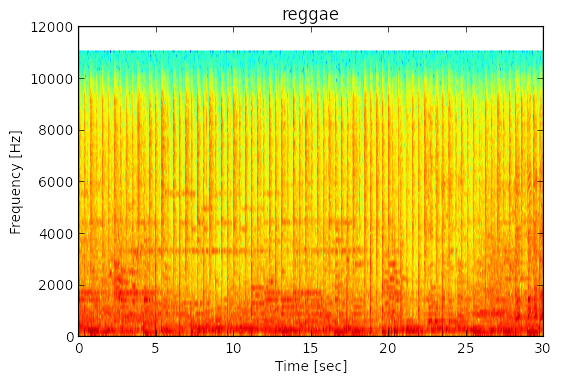

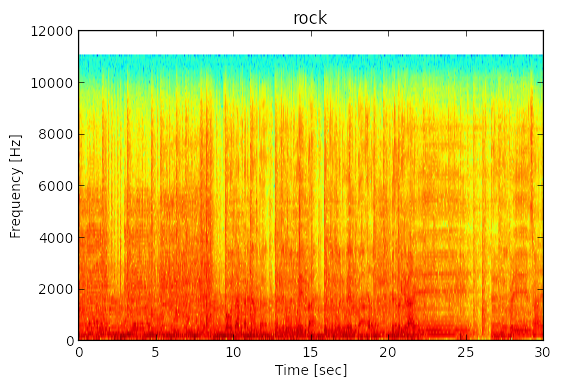

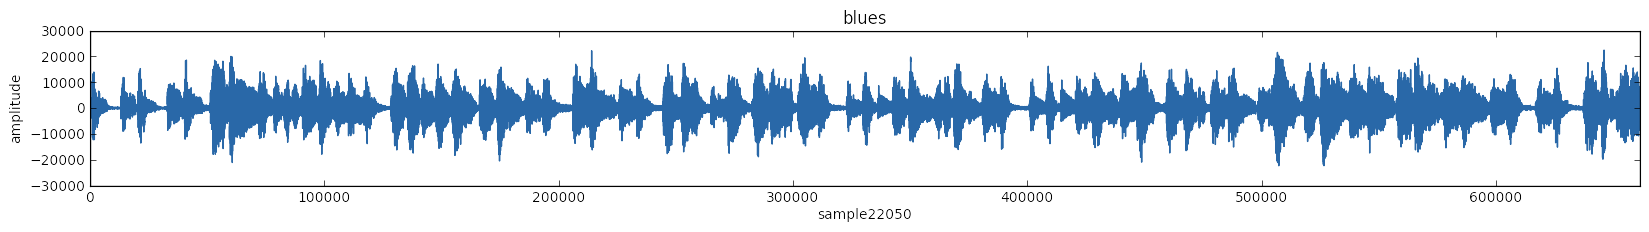

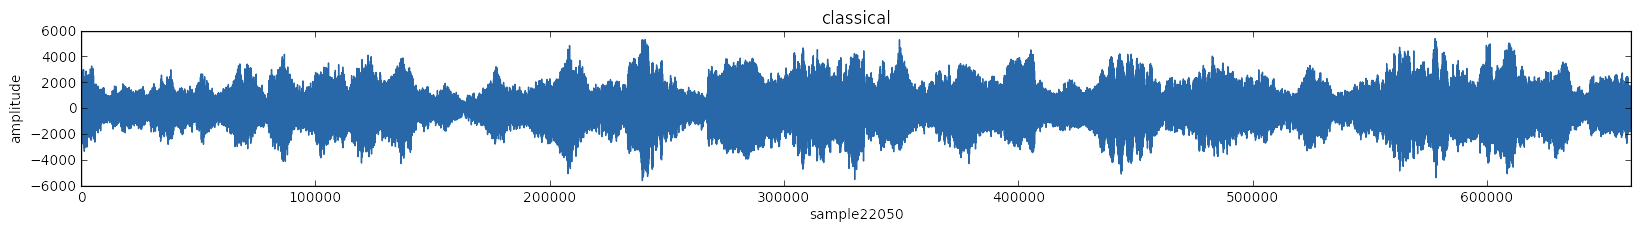

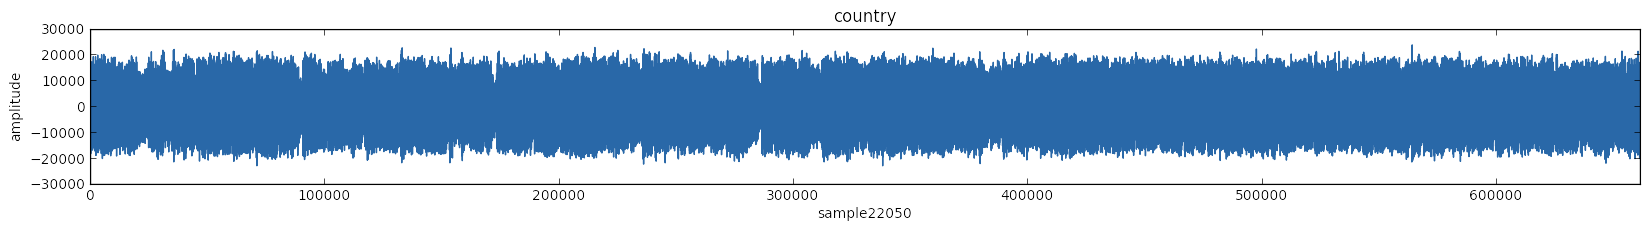

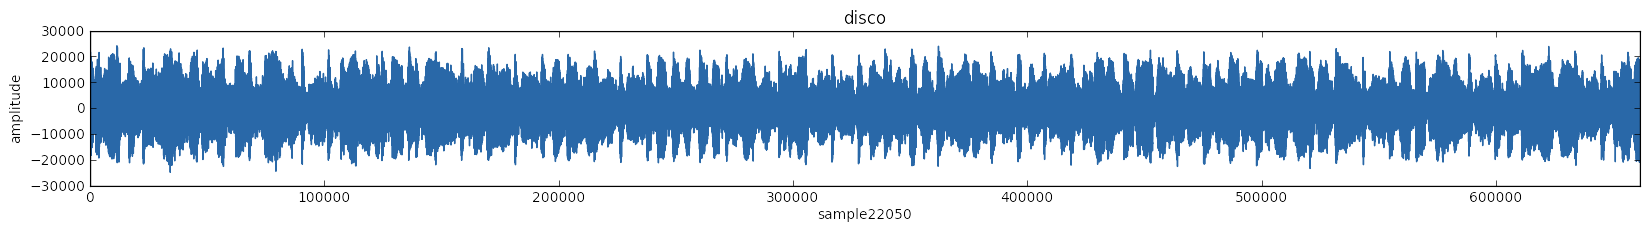

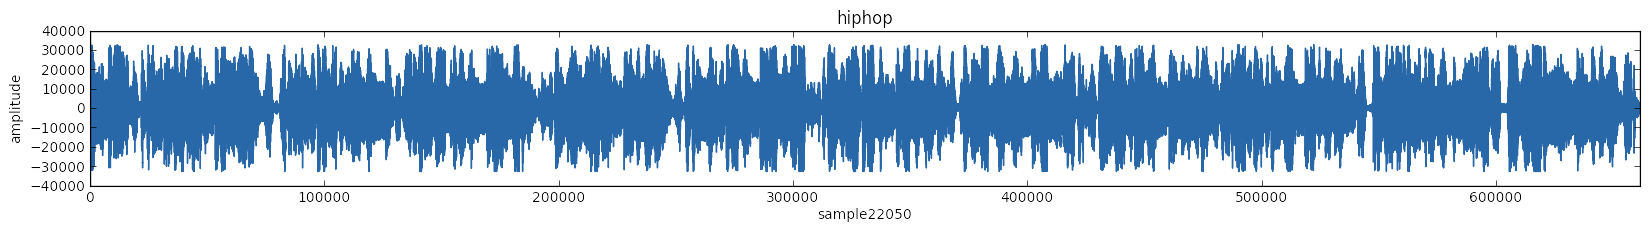

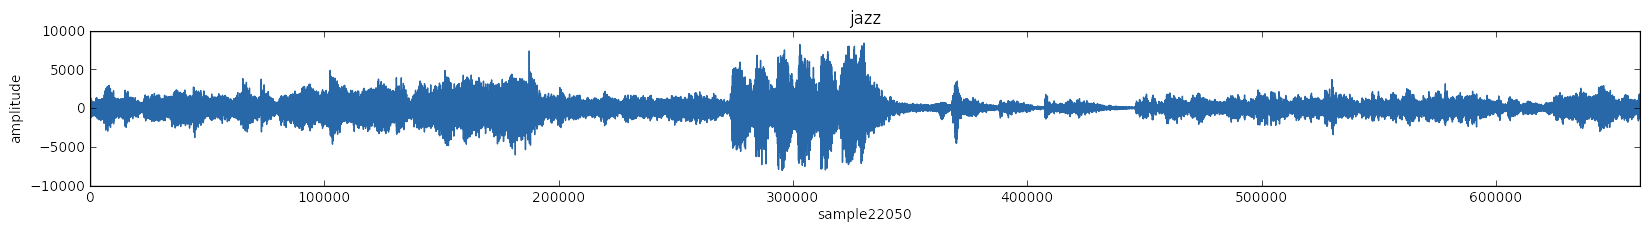

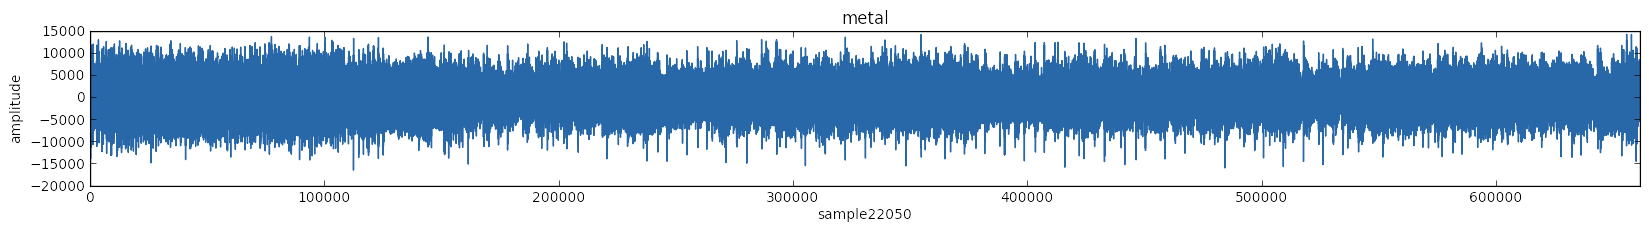

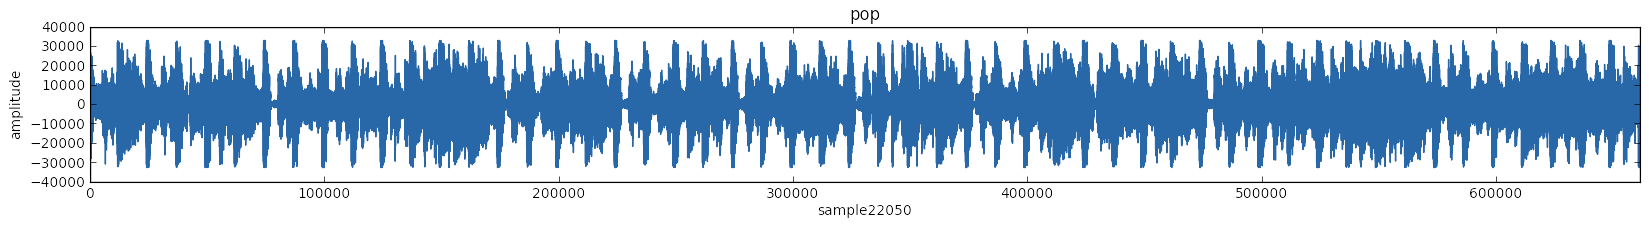

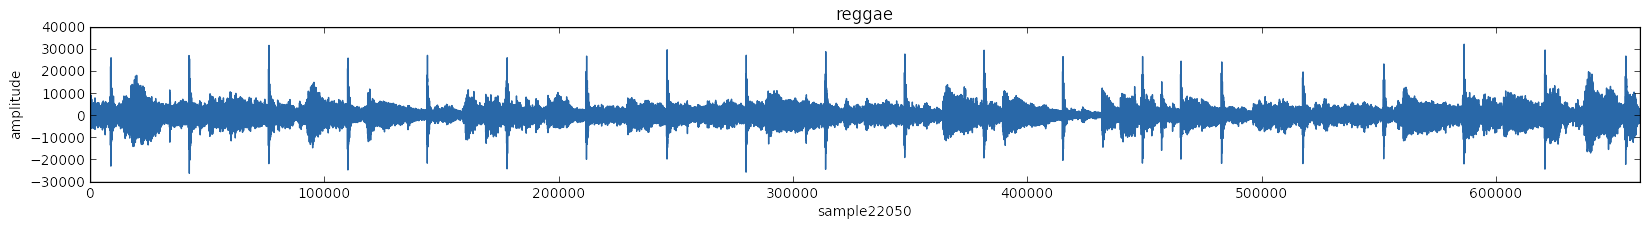

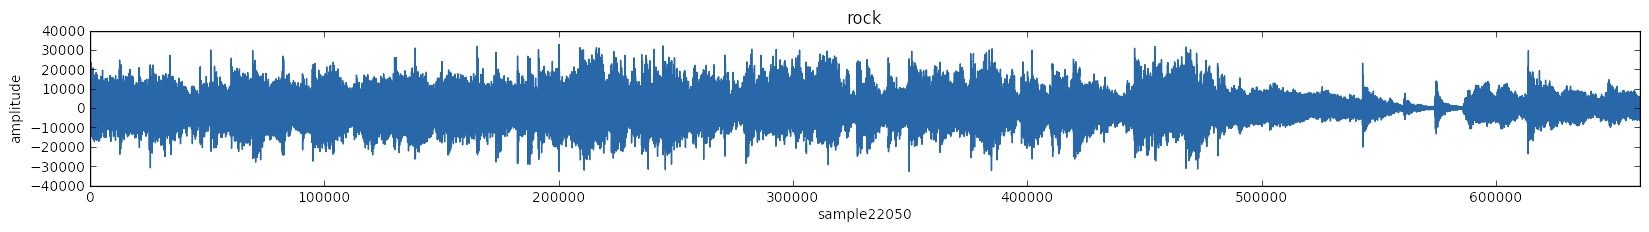

In [40]:
for i in range (1,1000,100):
    plt.specgram(X[i], Fs=sample_rate, xextent=(0,30))
    plt.title(genre_list[int(i/100)])
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

for i in range (1,1000,100):
    audiowave(X[i],sample_rate,genre_list,int(i/100))

# FFT